In [52]:
import pandas as pd
df=pd.read_csv('Hospitalizacion.csv')

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [54]:
df.head(2)

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0


In [55]:
#Poner a Capital letter para comodidad visual
df = df.apply(lambda x: x.str.title() if x.dtype == 'object' else x)
df.rename(columns=lambda x: x.title(), inplace=True)
df.head()

,Edad,Diabetes,Hospitalización Ultimo Mes,Psa,Biopsias Previas,Volumen Prostatico,Antibiotico Utiliazado En La Profilaxis,Numero De Muestras Tomadas,Cup,Enf. Cronica Pulmonar Obstructiva,Biopsia,Numero De Dias Post Biopsia En Que Se Presenta La Complicación Infecciosa,Fiebre,Itu,Tipo De Cultivo,Agente Aislado,Patron De Resistencia,Hospitalizacion,Dias Hospitalizacion Mq,Dias Hospitalización Upc
0,53.0,No,No,4.0,No,Si,Fluoroquinolona_Aminoglicosido,12.0,No,No,Neg,1,Si,No,No,No,No,Si,2.0,0.0
1,56.0,No,No,7.7,No,Si,Fluoroquinolona_Aminoglicosido,12.0,No,No,Neg,1,Si,No,No,No,No,Si,5.0,0.0
2,57.0,No,No,29.0,Si,Si,Fluoroquinolona_Aminoglicosido,24.0,No,No,Neg,1,Si,No,Hemocultivo,E.Coli,"Ampi R, Cipro R, Genta R, Sulfa M R",Si,4.0,3.0
3,56.0,No,No,7.0,No,Si,Fluoroquinolona_Aminoglicosido,12.0,No,No,Neg,1,Si,No,No,No,No,Si,5.0,0.0
4,55.0,No,No,29.0,Si,Si,Fluoroquinolona_Aminoglicosido,24.0,No,No,Neg,1,Si,No,Hemocultivo,E.Coli,No,Si,4.0,3.0


In [56]:
df.dtypes

Edad                                                                         float64
Diabetes                                                                      object
Hospitalización Ultimo Mes                                                    object
Psa                                                                          float64
Biopsias Previas                                                              object
Volumen Prostatico                                                            object
Antibiotico Utiliazado En La Profilaxis                                       object
Numero De Muestras Tomadas                                                   float64
Cup                                                                           object
Enf. Cronica Pulmonar Obstructiva                                             object
Biopsia                                                                       object
Numero De Dias Post Biopsia En Que Se Presenta La Complicación In

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Edad                                                                       568 non-null    float64
 1   Diabetes                                                                   568 non-null    object 
 2   Hospitalización Ultimo Mes                                                 568 non-null    object 
 3   Psa                                                                        564 non-null    float64
 4   Biopsias Previas                                                           566 non-null    object 
 5   Volumen Prostatico                                                         567 non-null    object 
 6   Antibiotico Utiliazado En La Profilaxis                   

In [58]:
#vemos las columnas categóricas
columnas_cat = df.select_dtypes(include=['object']).columns.tolist()
len(columnas_cat)

15

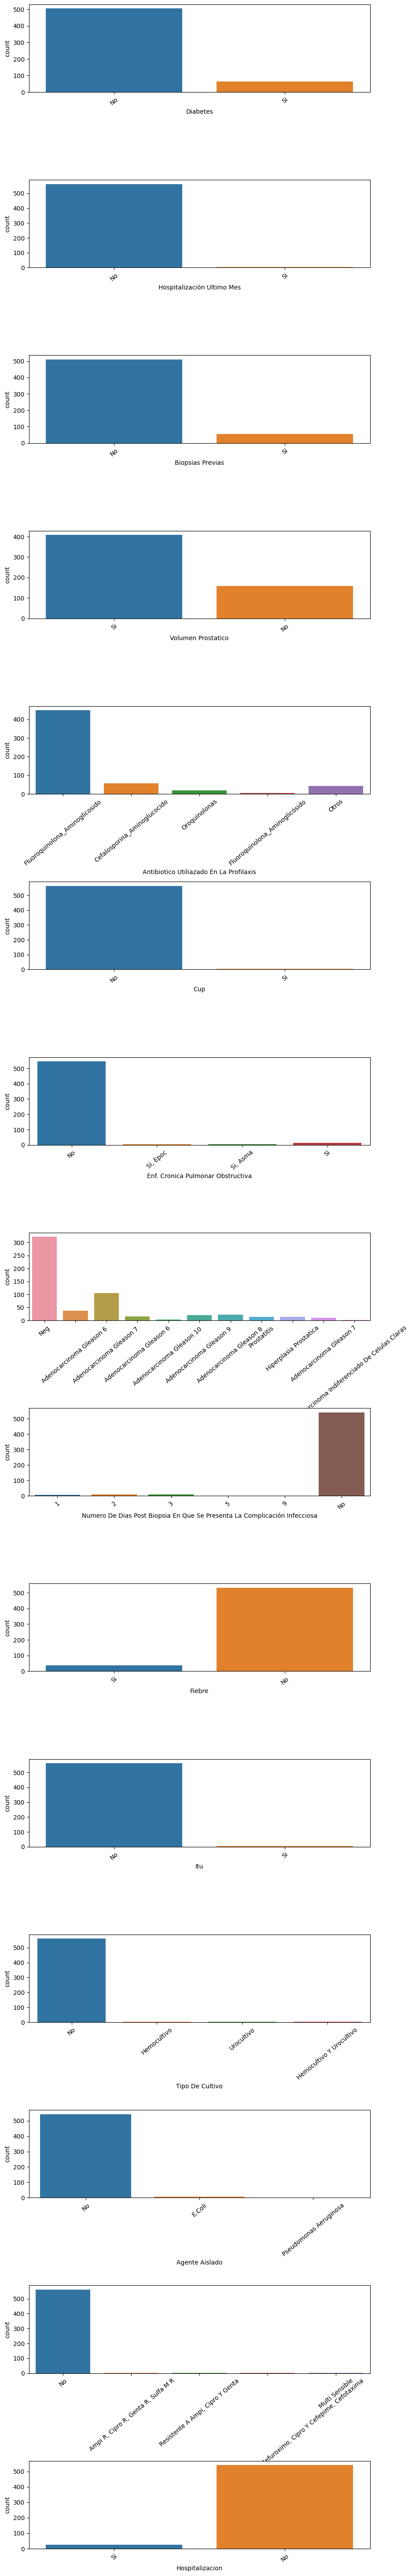

In [59]:
fig, axes = plt.subplots(nrows=len(columnas_cat), ncols=1, figsize=(10, 5 * len(columnas_cat)))
fig.subplots_adjust(hspace=1.0)

for i, col in enumerate(columnas_cat):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=40)

#### Obervaciones<br>
- Diabetes ----(si->505 ,no->63) 
- Hospitalización Ultimo Mes----(si->563 ,no->5)
- Biopsias Previas----(si->510 ,no->56)
- Volumen Prostatico----(si->408 ,no->159)

- Antibiotico Utiliazado En La Profilaxis----(Fluoroquinolona_Aminoglicosido->448,Cefalosporina_Aminoglucocido->56,Otros->42,Oroquinolonas->18,Fluoroquinolona_Aminoglicósido->4)

- Cup----(si->4,No->563)
- Enf. Cronica Pulmonar Obstructiva----(si->12 ,no->546, Si,Epoc->4, Si,Asma->4) Reacomodar Si,Epoc y Si,Asma
- Biopsia
    1. Neg                                            ->(322)
    2. Adenocarcinoma Gleason 7                       ->(106)
    3. Adenocarcinoma Gleason 6                       ->(38)
    4. Adenocarcinoma Gleason 8                       ->(22)
    5. Adenocarcinoma Gleason 9                       ->(20)
    6. Adenocarcinoma Gleason 6                       ->(16)
    7. Prostatitis                                    ->(14)
    8. Hiperplasia Prostatica                         ->(14)
    9. Adenocarcinoma Gleason 7                       ->(10)
    10. Adenocarcinoma Gleason 10                       ->(4)
    11. Carcinoma Indiferenciado De Celulas Claras      ->(2)

>
    
- Numero De Dias Post Biopsia En Que Se Presenta La Complicación Infecciosa
    1. No->542
    2. 2->9
    3. 3->8
    4. 1->5
    5. 5->2
    6. 9->2
>
- Fiebre----(Si->37,No->531)
- Itu----(Si->6,No->562)
- Tipo De Cultivo
    1. No->560
    2. Urocultivo->4
    3. Hemocultivo->2
    4. Hemocultivo Y Urocultivo->
>
- Agente Aislado
    1. No->543
    2. E.Coli->6
    3. Pseudomonas Aeruginosa->2
>
- Patron De Resistencia
    1. No->561
    2. Resistente A Ampi, Cipro Y Genta->2
    3. Resistente A Ampi, Sulfa, Cefadroxilo, Cefuroximo, Cipro Y Cefepime, Cefotaxima->2
    4. Multi Sensible->2
    5. Ampi R, Cipro R, Genta R, Sulfa M R->1
>
- Hospitalizacion
    1. No->541
    2. Si->24

In [89]:
columnas_cat[8:-1]

#Se utilizó 'unique()' para observar cada categoría y ver anomalías

['Numero De Dias Post Biopsia En Que Se Presenta La Complicación Infecciosa',
 'Fiebre',
 'Itu',
 'Tipo De Cultivo',
 'Agente Aislado',
 'Patron De Resistencia']

In [101]:
#Antibiotico Utiliazado En La Profilaxis---> corregir nombre de columna y tilde en Fluoroquinolona_Aminoglicosido/Fluoroquinolona_Aminoglicósido
df['Antibiotico Utiliazado En La Profilaxis'].replace({'Fluoroquinolona_Aminoglicósido':'Fluoroquinolona_Aminoglicosido'},inplace=True)
df.rename(columns={'Antibiotico Utiliazado En La Profilaxis':'Antibiotico Utilizado En La Profilaxis'},inplace=True)

#Enf. Cronica Pulmonar Obstructiva normalizamos categorías
df['Enf. Cronica Pulmonar Obstructiva'].replace({'Si, Epoc':'Si','Si, Asma':'Si'},inplace=True)

#Itu Renombramos columna
df.rename(columns={'Itu':'Infeccion/NoInfeccion'},inplace=True)

#Biopsia normalizamos categorias
df['Biopsia'].replace(" ", "", inplace=True)



In [106]:
df.describe()#Revizamos valores en las columnas numéricas

,Edad,Psa,Numero De Muestras Tomadas,Dias Hospitalizacion Mq,Dias Hospitalización Upc
count,568.000000,564.000000,568.000000,568.000000,568.000000
mean,63.882042,13.271401,12.996479,0.165493,0.014085
std,9.281517,15.668966,3.921180,0.958066,0.196474
min,39.000000,0.600000,4.000000,0.000000,0.000000
25%,59.000000,5.600000,12.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,12.000000,3.000000


In [107]:
df.Edad.describe() #outliers

count    568.000000
mean      63.882042
std        9.281517
min       39.000000
25%       59.000000
50%       64.000000
75%       69.000000
max      151.000000
Name: Edad, dtype: float64

In [108]:
#Eliminamos outliers en Edad
print(f"Tamaño del df antes de eliminar registros de edad{df.shape}")
df=df[df['Edad']<=100]
print(f"Tamaño del df después de eliminar registros de edad{df.shape}")


Tamaño del df antes de eliminar registros de edad(570, 20)
Tamaño del df después de eliminar registros de edad(566, 20)


<Axes: xlabel='Edad', ylabel='Count'>

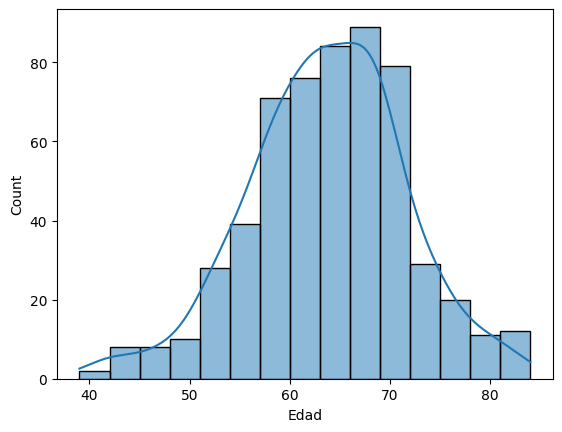

In [109]:
sns.histplot(x=df['Edad'],data=df,kde=True,bins=15) #La mayor parte de pacientes se encuentran entre los 60/70 años

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 566 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Edad                                                                       566 non-null    float64
 1   Diabetes                                                                   566 non-null    object 
 2   Hospitalización Ultimo Mes                                                 566 non-null    object 
 3   Psa                                                                        562 non-null    float64
 4   Biopsias Previas                                                           564 non-null    object 
 5   Volumen Prostatico                                                         565 non-null    object 
 6   Antibiotico Utilizado En La Profilaxis                         

In [126]:
df['Dias Hospitalización Upc'].value_counts()                                                               

Dias Hospitalización Upc
0.0    563
3.0      2
2.0      1
Name: count, dtype: int64

In [132]:
#Aplicamos las categorías correctas a las columnas numéricas
df['Edad'] = df['Edad'].astype(int)
df['Numero De Muestras Tomadas'] = df['Numero De Muestras Tomadas'].astype(int)
df['Dias Hospitalizacion Mq'] = df['Dias Hospitalizacion Mq'].astype(int)
df['Dias Hospitalización Upc'] = df['Dias Hospitalización Upc'].astype(int)


C:\Users\llaur\AppData\Local\Temp\ipykernel_9516\1016555714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Edad'] = df['Edad'].astype(int)
C:\Users\llaur\AppData\Local\Temp\ipykernel_9516\1016555714.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Numero De Muestras Tomadas'] = df['Numero De Muestras Tomadas'].astype(int)
C:\Users\llaur\AppData\Local\Temp\ipykernel_9516\1016555714.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 566 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Edad                                                                       566 non-null    int32  
 1   Diabetes                                                                   566 non-null    object 
 2   Hospitalización Ultimo Mes                                                 566 non-null    object 
 3   Psa                                                                        562 non-null    float64
 4   Biopsias Previas                                                           564 non-null    object 
 5   Volumen Prostatico                                                         565 non-null    object 
 6   Antibiotico Utilizado En La Profilaxis                         

In [138]:
df['Numero De Muestras Tomadas'].value_counts()

Numero De Muestras Tomadas
12    430
24     42
18     36
6      26
10     10
4       6
16      4
20      4
8       2
15      2
22      2
14      2
Name: count, dtype: int64

In [147]:
plt.clf()

<Figure size 640x480 with 0 Axes>

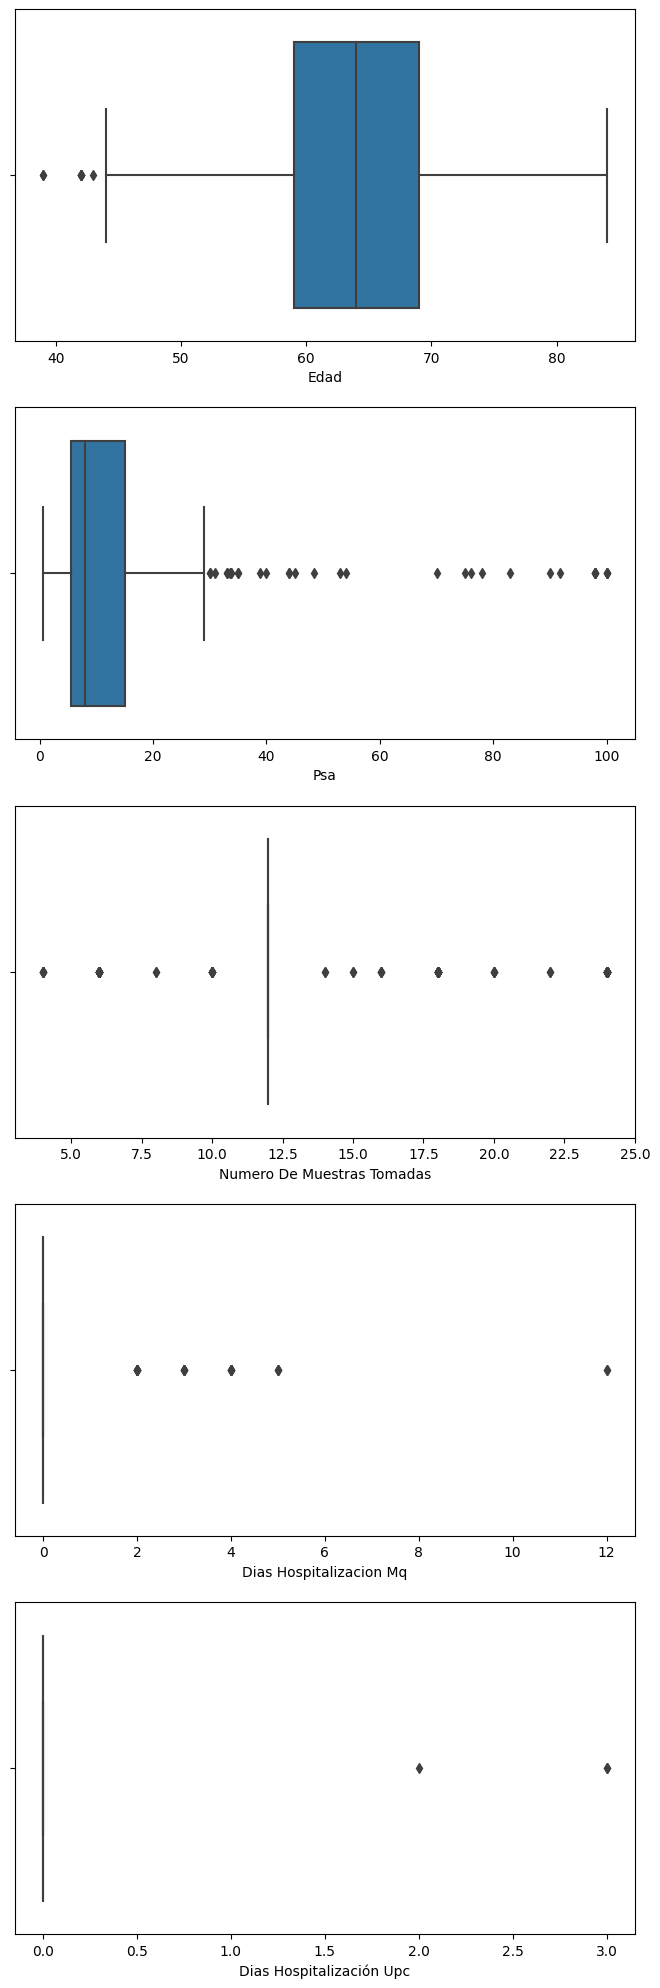

In [148]:
columnas_num2=df.select_dtypes(np.number).columns
fig,ax=plt.subplots(nrows=len(columnas_num2),ncols=1,figsize=(8,25))
for i,col in enumerate(columnas_num2):
    sns.boxplot(x=col,data=df,ax=ax[i])

In [149]:
#importamos a csv para continuar con la preparación
df_2=df.to_csv('Hospitalizacion_2.csv',index=False)